In [1]:
# Gerando dados 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

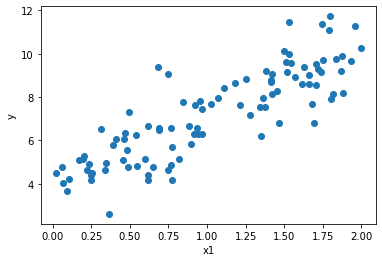

In [3]:
plt.scatter(x = X, y = y)
plt.xlabel('x1')
plt.ylabel('y')

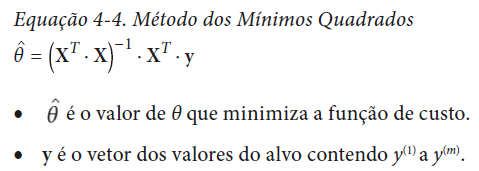

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.02124565],
       [3.09169927]])

In [5]:
# Realizando uma previsão com os parâmetros encontrados através dos Minimos quadrativos
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.02124565],
       [10.20464419]])

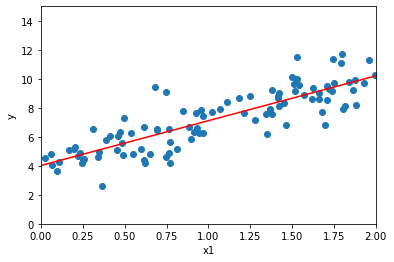

In [6]:
plt.scatter(x = X, y = y)
plt.plot(X_new,y_predict,'r-')
plt.axis([0,2,0,15])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [7]:
## Mesma técnica com sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02124565]), array([[3.09169927]]))

# Otimização gradiente descendente

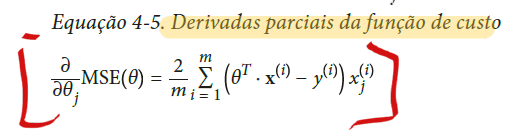  

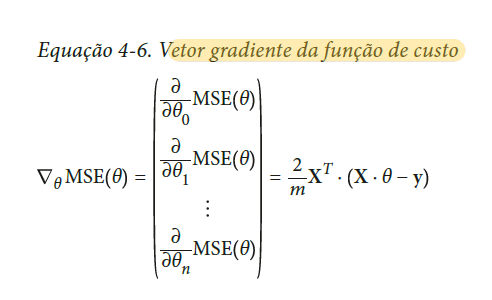  

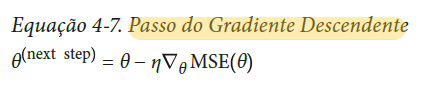


In [8]:
# Implementação gradiente descendente

eta = 0.1 # learn rate (tx aprendizado)
n_iterations = 1000
m = 100 # numero de amostras

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta



array([[4.02124565],
       [3.09169927]])

# Gradiente descendente Estocástico `SGD`

In [9]:
# Implementacão

n_epochs = 50
t0, t1 =5, 50 # hiperparâmetros de aprendizado
m= 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta -eta*gradients
        
theta 
    

array([[3.99414243],
       [3.11741777]])

In [10]:
# Com Sklearn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change = 50, penalty=None, eta0 = 0.1)

In [11]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, n_iter_no_change=50, penalty=None)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04469911]), array([3.12186922]))

# Regreção Polinomial

In [15]:
# Gerando dados polinomio grau 2
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5*X**2 +X +2+np.random.randn(m,1)

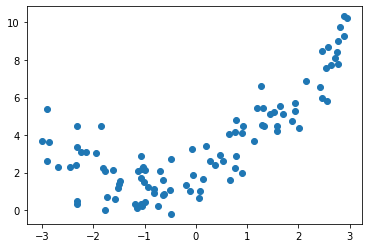

In [16]:
plt.scatter(x = X, y = y)
plt.show()

# Tecnica Transformação de Variável

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree  = 2, include_bias=False)

X_poly = poly_features.fit_transform(X)

print(X[0], X_poly[0])

[-0.93074192] [-0.93074192  0.86628052]


In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.93483127]), array([[1.00968933, 0.52469916]]))

In [59]:
# Curva de aprendizado

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_erros, val_erros = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_erros.append(mean_squared_error(y_train_pred, y_train[:m]))
        val_erros.append(mean_squared_error(y_val_pred, y_val))
        #train_erros.append(mean_squared_error(y_train[:m],y_pred_train))
        #val_erros.append(mean_squared_error(y_val,y_val_pred))
    plt.plot(np.sqrt(train_erros), 'r-+', linewidth = 3, label = 'train')
    plt.plot(np.sqrt(val_erros), 'b-', linewidth = 3, label = 'val')

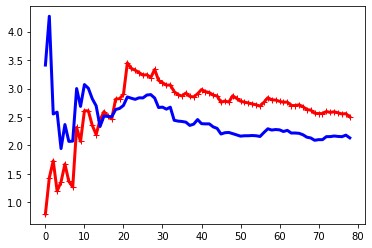

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [68]:
# Aumentando o grau de liberdade (variancia) do  modelo

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
    ('lin_reg', LinearRegression())
])



Text(0, 0.5, 'RMSE')

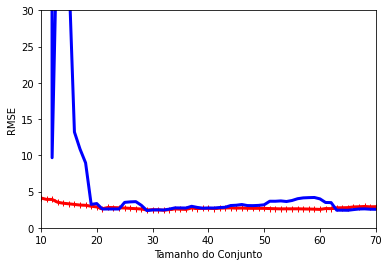

In [80]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([10,70,0,30])
plt.xlabel('Tamanho do Conjunto')
plt.ylabel('RMSE')

# Modelos Lineares Regularizados

## Regressão Ridge



In [81]:
>>> from sklearn.linear_model import Ridge
>>> ridge_reg = Ridge(alpha=1, solver="cholesky")
>>> ridge_reg.fit(X, y)
>>> ridge_reg.predict([[1.5]])

array([[5.15740753]])

In [82]:
# E utilizando Gradiente Descendente Estocástico
>>> sgd_reg = SGDRegressor(penalty="l2")
>>> sgd_reg.fit(X, y.ravel())
>>> sgd_reg.predict([[1.5]])

array([5.13311326])

## Lasso

In [83]:
>>> from sklearn.linear_model import Lasso
>>> lasso_reg = Lasso(alpha=0.1)
>>> lasso_reg.fit(X, y)
>>> lasso_reg.predict([[1.5]])

array([5.11318216])

## Elastic Net

In [84]:
>>> from sklearn.linear_model import ElasticNet
>>> elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
>>> elastic_net.fit(X, y)
>>> elastic_net.predict([[1.5]])

array([5.11075349])